# Tutorial 9: Bayesian Classifier
### Dr. Daugherity, PHYS 453 - Spring 2020

Using Kernel (Probability Density) Estimation and Bayesian statistics as a classifier!

**REFERENCES**
* https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html 


# Bayesian Classifier TESTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap # for making palettes
from sklearn import datasets  # for generating toy data
from sklearn import naive_bayes
from scipy.stats import norm
from scipy.stats import multivariate_normal

Start with the blob dataset from tutorial 8.  GaussNB will simply fit a gaussian to each class:  
$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$  
and then classify new points as the highest posterior probability


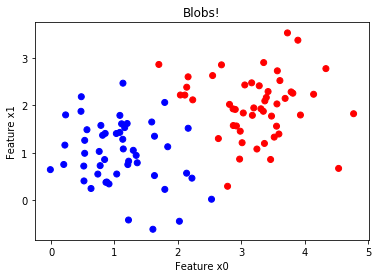

In [2]:
X_blob, y_blob = datasets.make_blobs(n_samples=100, centers=[[1,1],[3,2]], cluster_std=0.7, n_features=2, random_state=1)
                                     
plt.figure()
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.bwr)
plt.xlabel("Feature x0")
plt.ylabel("Feature x1")
plt.title("Blobs!")
plt.show()

In [3]:
def plot_decision(clf, X, cmap='coolwarm', h=0.2, margin=0.2):
    """Plots decision boundary of clf.  X is only used to find min/max range; h = grid size; margin = extra border padding"""
    x_min, x_max = X[:, 0].min()-margin, X[:, 0].max()+margin
    y_min, y_max = X[:, 1].min()-margin, X[:, 1].max()+margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap)

There are no parameters to choose here.  The decision is which classifier from the naive_bayes model to use.   
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes  
They all make different choices for kernel estimation.  

Training and using GaussNB is really easy

0.99


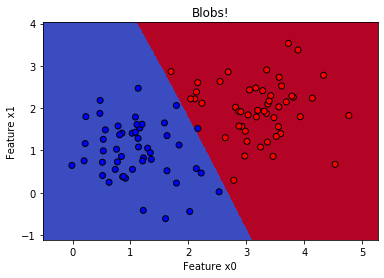

In [4]:
clf = naive_bayes.GaussianNB()
clf.fit(X_blob,y_blob)
print(clf.score(X_blob,y_blob))


plt.figure()

plot_decision(clf, X_blob,cmap=plt.cm.coolwarm, h=0.01,margin=0.5)

plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.bwr, ec='k')
plt.xlabel("Feature x0")
plt.ylabel("Feature x1")
plt.title("Blobs!")
plt.show()


In [5]:
X, y = datasets.load_iris(return_X_y=True)
X2 = X[:,[2,0]]  # only save columns 2 and 0
clf = naive_bayes.GaussianNB()
clf.fit(X2,y)
clf.score(X2,y)

0.9133333333333333

In [6]:
# Borrow a color palette from the sklearn example
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

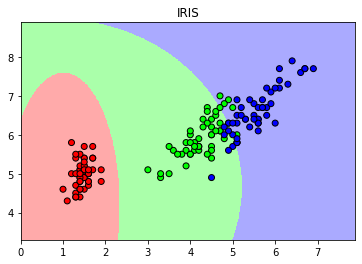

In [7]:
plt.figure()
plot_decision(clf,X2,cmap=cmap_light,margin=1, h=0.01)
plt.scatter(X2[:,0], X2[:,1], c=y, marker='o', edgecolor='k',cmap=cmap_bold)
plt.title("IRIS")
plt.show()

Let's look under the hood at the Gaussian Fits

In [8]:
clf.theta_

array([[1.462, 5.006],
       [4.26 , 5.936],
       [5.552, 6.588]])

In [9]:
clf.sigma_

array([[0.029556, 0.121764],
       [0.2164  , 0.261104],
       [0.298496, 0.396256]])

In [10]:
clf.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [11]:
mu = clf.theta_
sig = clf.sigma_

Use the scipy.stats libraries to draw Gaussians:
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html

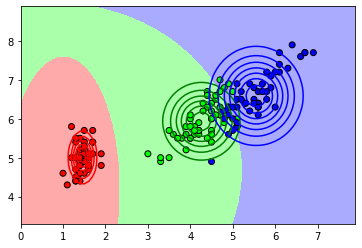

In [12]:
plt.figure()

rv0 = multivariate_normal(mean=mu[0], cov=sig[0])
rv1 = multivariate_normal(mean=mu[1], cov=sig[1])
rv2 = multivariate_normal(mean=mu[2], cov=sig[2])

# Make a special meshgrid for the 2D gaussian contours
margin=1
h=0.1
x_min, x_max = X2[:, 0].min()-margin, X2[:, 0].max()+margin
y_min, y_max = X2[:, 1].min()-margin, X2[:, 1].max()+margin   
xx, yy = np.mgrid[x_min:x_max:h, y_min:y_max:h]
pos = np.empty(xx.shape + (2,))
pos[:, :, 0] = xx; pos[:, :, 1] = yy

plot_decision(clf,X2,cmap=cmap_light,margin=1, h=0.01)
plt.scatter(X2[:,0], X2[:,1], c=y, marker='o', cmap=cmap_bold,edgecolor='k')
plt.contour(xx, yy, rv0.pdf(pos),colors='red')
plt.contour(xx, yy, rv1.pdf(pos),colors='green')
plt.contour(xx, yy, rv2.pdf(pos),colors='blue')

plt.show()

# RESULTS
GNB just fits a gaussian to each class.  You can access fit pars with theta_ and sigma_.  Classificaion is choosing max eval gauss at each point (scaled by priors somehow)

In [13]:
x = np.array([[2,5],[2.5,5],[3,5],[4.5,5]])
print(clf.predict(x))
print(clf.predict_proba(x))
print(rv0.pdf(x))
print(rv1.pdf(x))
print(rv2.pdf(x))

[0 1 1 1]
[[9.99952708e-01 4.72918543e-05 6.42701362e-10]
 [3.30124545e-04 9.99636897e-01 3.29787656e-05]
 [3.47271199e-15 9.99889972e-01 1.10028325e-04]
 [3.66453455e-67 9.73257253e-01 2.67427466e-02]]
[1.98214556e-02 3.21898219e-08 1.10869906e-17 4.12260237e-68]
[9.37437722e-07 9.74727088e-05 3.19225169e-03 1.09491468e-01]
[1.27398790e-11 3.21569725e-09 3.51276756e-07 3.00855972e-03]
